In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import DataFrame

TOPICS = {
    "topics.topic_0": "Command Line",
    "topics.topic_1": "Client-Server",
    "topics.topic_2": "Cloud",
    "topics.topic_3": "Resource Management",
    "topics.topic_4": "Error Handling & Logging"
}



In [2]:
df = pd.read_csv('full.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
for col in df.columns:
	if 'language' in col:
		df.drop(columns=[col], inplace=True)
df.describe()

,analyzed_paths,pairs,similarities,issues,commits,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
count,13703.000000,1.370300e+04,10467.000000,13703.000000,13703.000000,13703.000000,13703.000000,11468.000000,9266.000000,9049.000000,13703.000000,1.370300e+04,1.370300e+04,13703.000000,8324.000000,6996.000000
mean,76.884259,5.942503e+04,154.098596,174.068379,784.590309,26.883456,1160.930453,0.360950,0.279739,0.260759,10936.597023,8.822849e+04,1.700028e+04,350.551850,0.279741,0.319453
std,336.190415,1.930047e+06,1014.191085,1096.738333,3401.684323,96.088596,3632.434057,0.256544,0.213156,0.210155,42794.313040,3.295197e+05,9.286598e+04,1258.837789,0.237410,0.271506
min,2.000000,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,101.000000,0.010099,0.010063,0.010016,10.000000,7.200000e+01,0.000000e+00,2.000000,0.010025,0.010026
25%,6.000000,1.500000e+01,7.000000,7.000000,65.000000,3.000000,159.000000,0.143918,0.108315,0.090124,255.000000,1.498000e+03,1.170000e+02,15.000000,0.084595,0.076527
50%,17.000000,1.360000e+02,30.000000,25.000000,173.000000,7.000000,286.000000,0.309139,0.228687,0.206502,755.000000,4.567000e+03,4.380000e+02,40.000000,0.209104,0.244908
75%,51.000000,1.275000e+03,117.000000,88.000000,513.000000,21.000000,731.000000,0.537906,0.408324,0.386560,3188.000000,2.098000e+04,2.306000e+03,145.000000,0.422939,0.519784
max,18370.000000,1.687193e+08,80513.000000,60246.000000,164293.000000,3927.000000,117805.000000,0.999101,0.999764,0.997521,827986.000000,6.593969e+06,2.693242e+06,33349.000000,0.996716,0.999707


In [4]:
epsilon = 1e-6
df['contributors'] = df['contributors'].apply(lambda x: x if x > 0 else epsilon)
df['commits'] = df['commits'].apply(lambda x: x if x > 0 else epsilon)
df['issues'] = df['issues'].apply(lambda x: x if x > 0 else epsilon)
df['stars'] = df['stars'].apply(lambda x: x if x > 0 else epsilon)
df['analyzed_paths'] = df['analyzed_paths'].apply(lambda x: x if x > 0 else epsilon)
df['pairs'] = df['pairs'].apply(lambda x: x if x > 0 else epsilon)
df['similarities'] = df['similarities'].apply(lambda x: x if x > 0 else epsilon)

# df2 = df.loc[:, ["similarities", "issues"]]
# 
# epsilon = 1e-9
# df2['issues'] = df2['issues'].apply(lambda x: x if x > 0 else epsilon)
# df2.corr()


In [5]:
df_nona = df.dropna()

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
df.head()

Mean Squared Error: 96836.40828933466
Coefficients: [ 1.12912796e-04  1.97676821e-01 -8.05711146e-04  4.06896989e-06
 -4.39483167e-02 -4.01863091e-02]
Intercept: 117.08980766371077


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,0.692835,0.247408,0.058288,2539,12621,110,97,NaN,NaN
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,0.888254,NaN,0.106459,45439,425248,43672,1701,NaN,NaN
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,0.333218,0.591452,NaN,760,3971,327,64,0.074183,NaN
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,NaN,0.232586,0.029679,237,2759,213,4,NaN,0.734904
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,0.118695,0.071108,0.575756,3529,27510,2559,89,0.025523,0.208917


In [6]:
def filter_outliers(series, lower_percentile=0.1, upper_percentile=0.99):
	lower_bound = series.quantile(lower_percentile)
	upper_bound = series.quantile(upper_percentile)
	return series[(series > lower_bound) & (series < upper_bound)]


df['log_stars'] = np.log1p(df['stars'])
df['log_contributors'] = np.log1p(df['contributors'])
df['log_commits'] = np.log1p(df['commits'])
df['log_pairs'] = np.log1p(df['pairs'])
df['log_analyzed_paths'] = np.log1p(df['analyzed_paths'])
df['log_issues'] = np.log1p(df['issues'])
df['log_similarities'] = np.log1p(df['similarities'])
df['log_nfiles'] = np.log1p(df['loc.nFiles'])

df['log_stars'] = filter_outliers(df['log_stars'])
df['log_contributors'] = filter_outliers(df['log_contributors'])
df['log_commits'] = filter_outliers(df['log_commits'])
df['log_pairs'] = filter_outliers(df['log_pairs'])
df['log_analyzed_paths'] = filter_outliers(df['log_analyzed_paths'])
df['log_issues'] = filter_outliers(df['log_issues'])
df['log_similarities'] = filter_outliers(df['log_similarities'])
df['log_nfiles'] = filter_outliers(df['log_nfiles'])

# remove nan values
df.dropna(inplace=True)

In [7]:
sample = df.sample(100)
sample.head()

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_2,topics.topic_4,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities,log_nfiles
9070,Tinkoff/invest-openapi-go-sdk,6,15,13.0,39.0,Apache-2.0,52,2019-11-01,12.0,153,...,0.022464,0.022684,5.036953,2.564949,3.970292,2.772589,1.945910,3.688879,2.639057,2.302585
1885,rsc/c2go,26,325,209.0,6.0,BSD-3-Clause,49,2015-01-20,2.0,499,...,0.013976,0.013698,6.214608,1.098612,3.912023,5.786897,3.295837,1.945910,5.347108,3.583519
6657,kasvith/kache,17,136,90.0,37.0,MIT,241,2018-07-24,5.0,350,...,0.023402,0.081773,5.860786,1.791759,5.488938,4.919981,2.890372,3.637586,4.510860,3.828641
5343,bwhaley/ssmsh,9,36,21.0,19.0,MIT,101,2017-10-18,7.0,295,...,0.079555,0.012826,5.690359,2.079442,4.624973,3.610918,2.302585,2.995732,3.091042,2.995732
9633,sashabaranov/go-openai,28,378,92.0,265.0,Apache-2.0,279,2020-08-18,118.0,7714,...,0.036578,0.779123,8.950922,4.779123,5.634790,5.937536,3.367296,5.583496,4.532599,4.317488


In [8]:
sample['log_similarities']

9070    2.639057
1885    5.347108
6657    4.510860
5343    3.091042
9633    4.532599
          ...   
2395    3.583519
735     6.501290
1795    5.690359
6672    2.564949
5419    4.691348
Name: log_similarities, Length: 100, dtype: float64

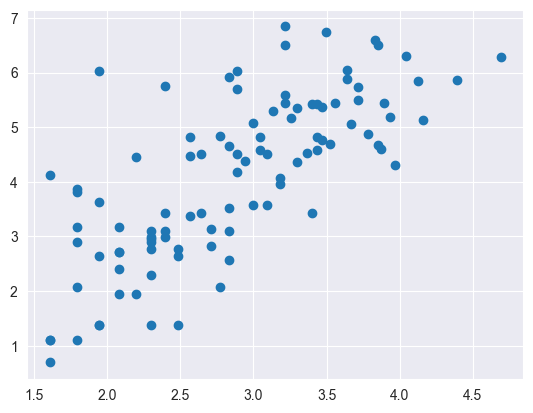

In [9]:
plt.scatter(sample['log_analyzed_paths'], sample['log_similarities'])

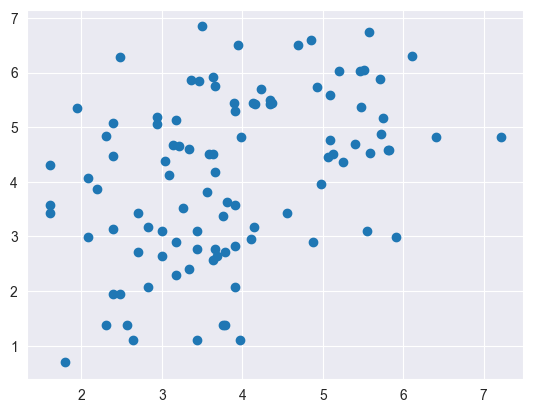

In [10]:
plt.scatter(sample['log_issues'], sample['log_similarities'])

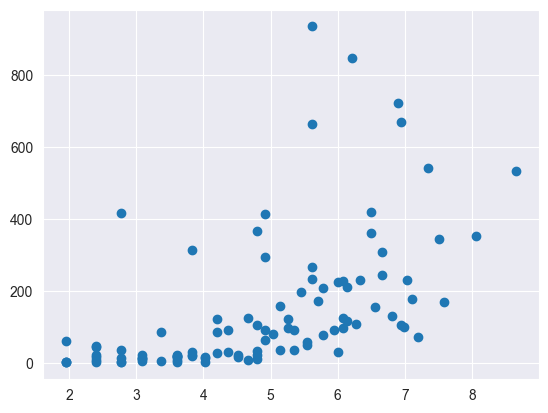

In [11]:
plt.scatter(sample['log_pairs'], sample['similarities'])

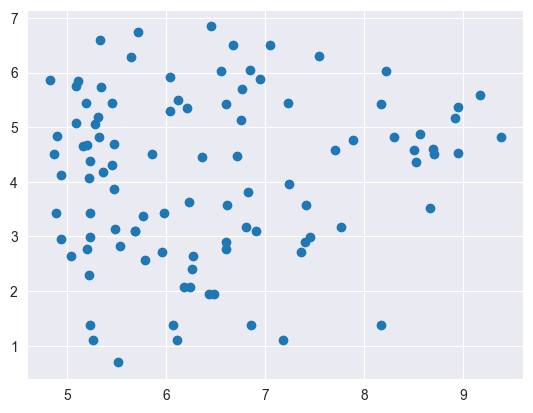

In [12]:
plt.scatter(sample['log_stars'], sample['log_similarities'])

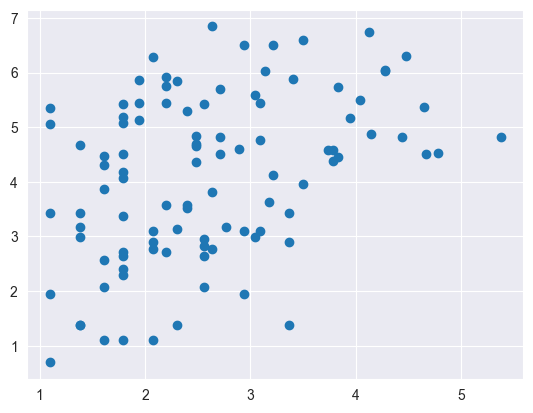

In [13]:
plt.scatter(sample['log_contributors'], sample['log_similarities'])

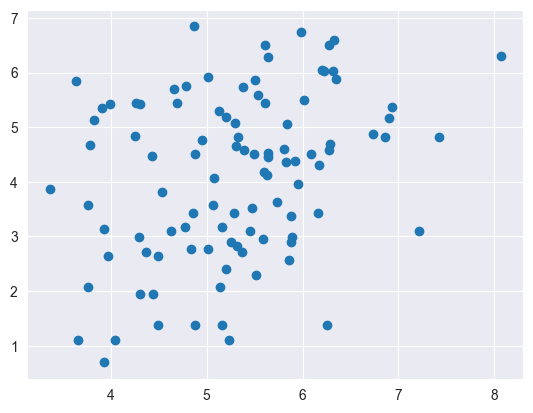

In [14]:
plt.scatter(sample['log_commits'], sample['log_similarities'])

In [15]:
reg_stars = np.polyfit(sample['log_stars'], sample['log_similarities'], deg = 1)
reg_stars

array([0.13840798, 3.21600593])

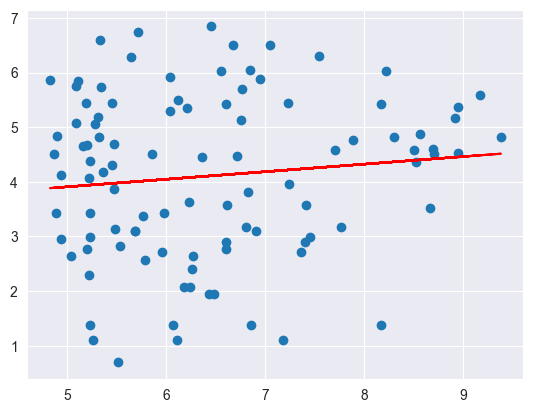

In [16]:
trend_stars = np.polyval(reg_stars, sample['log_stars'])
plt.scatter(sample['log_stars'], sample['log_similarities'])
plt.plot(sample['log_stars'], trend_stars, color='red')

In [17]:
reg_contributors = np.polyfit(sample['log_contributors'], sample['log_similarities'], deg = 1)
reg_contributors

array([0.62962439, 2.46671273])

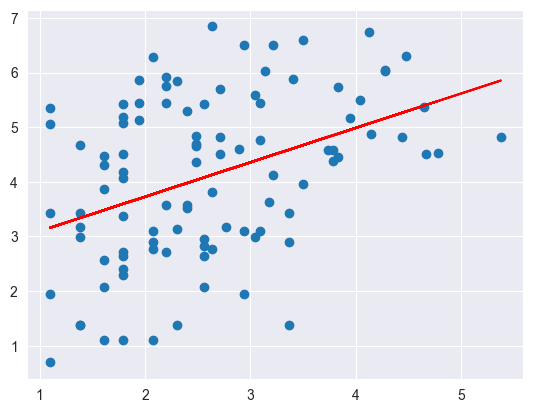

In [18]:
trend_contributors = np.polyval(reg_contributors, sample['log_contributors'])
plt.scatter(sample['log_contributors'], sample['log_similarities'])
plt.plot(sample['log_contributors'], trend_contributors, color='red')

In [19]:
reg_commits = np.polyfit(sample['log_commits'], sample['log_similarities'], deg = 1)
reg_commits

array([0.5250236 , 1.33193533])

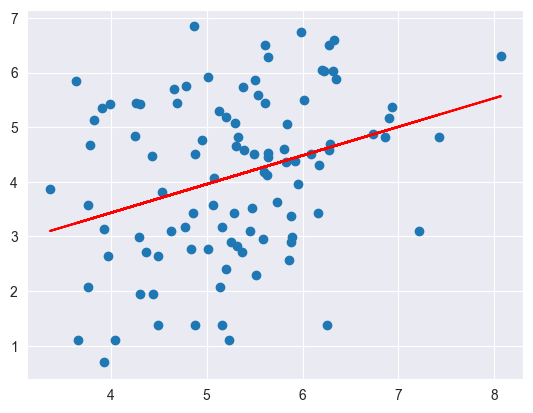

In [20]:
trend_commits = np.polyval(reg_commits, sample['log_commits'])
plt.scatter(sample['log_commits'], sample['log_similarities'])
plt.plot(sample['log_commits'], trend_commits, color='red')

In [21]:
reg_pairs = np.polyfit(sample['log_pairs'], sample['log_similarities'], deg = 1)
reg_pairs

array([0.69707665, 0.74388593])

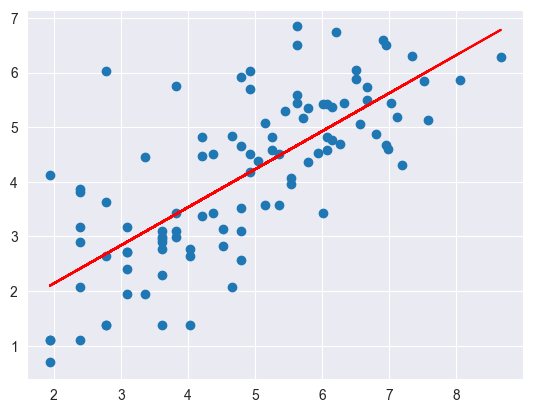

In [22]:
trend_pairs = np.polyval(reg_pairs, sample['log_pairs'])
plt.scatter(sample['log_pairs'], sample['log_similarities'])
plt.plot(sample['log_pairs'], trend_pairs, color='red')

In [23]:
reg_analyzed_paths = np.polyfit(sample['log_analyzed_paths'], sample['log_similarities'], deg = 1)
reg_analyzed_paths

array([ 1.52571197, -0.26802624])

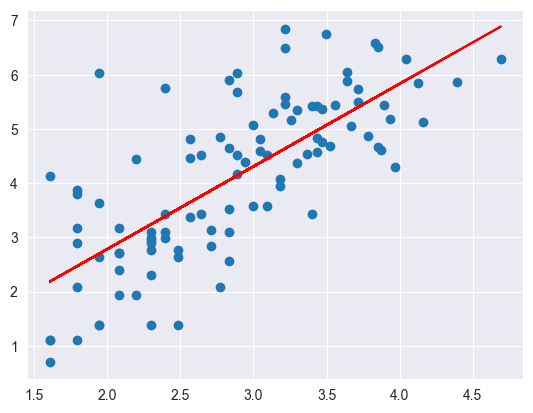

In [24]:
trend_analyzed_paths = np.polyval(reg_analyzed_paths, sample['log_analyzed_paths'])
plt.scatter(sample['log_analyzed_paths'], sample['log_similarities'])
plt.plot(sample['log_analyzed_paths'], trend_analyzed_paths, color='red')

In [25]:
reg_issues = np.polyfit(sample['log_issues'], sample['log_similarities'], deg = 1)
reg_issues

array([0.48481569, 2.24219785])

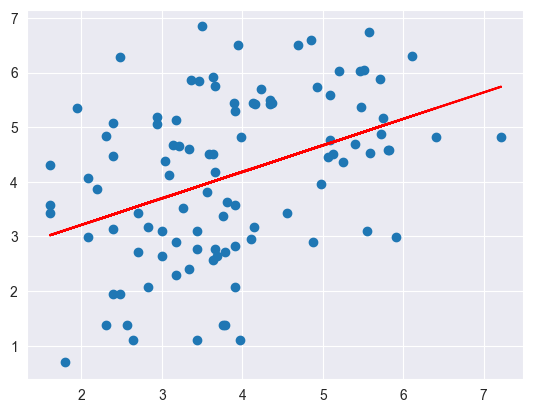

In [26]:
trend_issues = np.polyval(reg_issues, sample['log_issues'])
plt.scatter(sample['log_issues'], sample['log_similarities'])
plt.plot(sample['log_issues'], trend_issues, color='red')

<Axes: xlabel='log_stars', ylabel='log_similarities'>

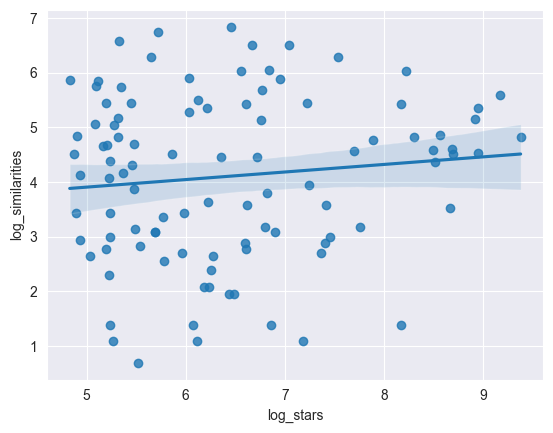

In [27]:
sb.regplot(x='log_stars', y='log_similarities', data=sample)

# Linear Regression

In [28]:
df_small = DataFrame(df, columns=['log_contributors', 'log_commits', 'log_issues', 'log_similarities', 'log_stars', 'log_pairs', 'log_analyzed_paths', 'log_nfiles'])

## Stars vs Similarities

R^2 Score: -0.09122298225559256
R^2 Score: 0.06216860918749678
R^2 Score: 0.010615121562152052
R^2 Score: -0.06493344595544692
R^2 Score: -0.15825328716653075
R^2 Score: -0.0759066271652209
R^2 Score: 0.03376171476895684
R^2 Score: 0.12868828255121456
R^2 Score: -0.10264833995822964
R^2 Score: -0.16028051730502213
R^2 Score: -0.14277826349972078
R^2 Score: -0.15429023851944468
R^2 Score: -0.05908042048747841
R^2 Score: -0.0055761131807638975
R^2 Score: -0.16892287215422974
R^2 Score: 0.019523661536967274
R^2 Score: -0.278585367192977
R^2 Score: -0.0686362480640883
R^2 Score: -0.0630843372040013
R^2 Score: -0.008460668768854429
R^2 Score: 0.07506409157650262
R^2 Score: -0.3776702226965378
R^2 Score: -0.13564248921069222
R^2 Score: -0.05569438140590566
R^2 Score: -0.5606856002107052
R^2 Score: 0.010595005631001464
R^2 Score: -0.013911880580558478
R^2 Score: -0.03203304246517735
R^2 Score: -0.006385920838826387
R^2 Score: 0.009332628462630832
R^2 Score: -0.00022696430240687349
R^2 Score: 

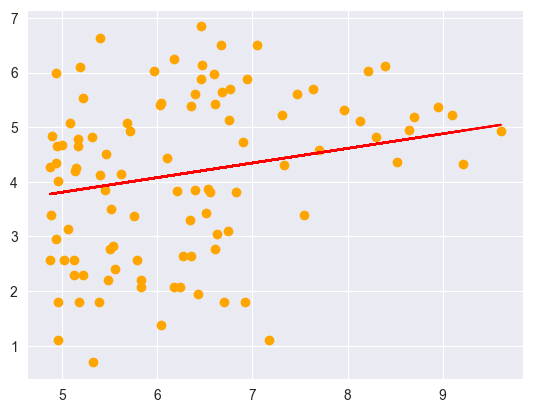

In [29]:
from pandas import DataFrame
from sklearn.linear_model import HuberRegressor

r2_score = -1
while r2_score < 0.2:
	sample = df_small.sample(100)
	X = DataFrame(sample, columns=['log_stars'])
	y = DataFrame(sample, columns=['log_similarities'])

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
	model = HuberRegressor()
	model.fit(X_train, y_train.values.ravel())

	r2_score  = model.score(X_test, y_test)

	print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='orange')
plt.plot(X, y_pred, color='red')
plt.show()


R^2 Score: 0.02562612240501916


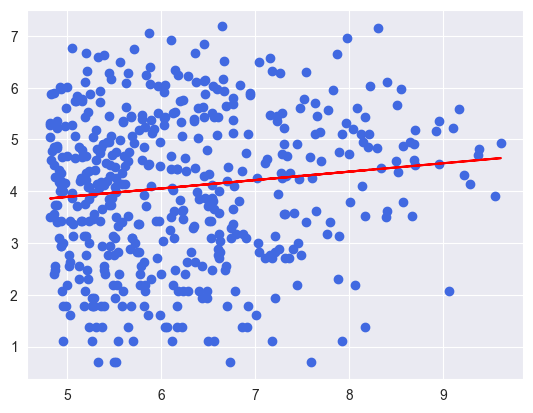

In [30]:
X = DataFrame(df, columns=['log_stars'])
y = DataFrame(df, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()


## Contributors vs Similarities

R^2 Score: 0.2502758463804028


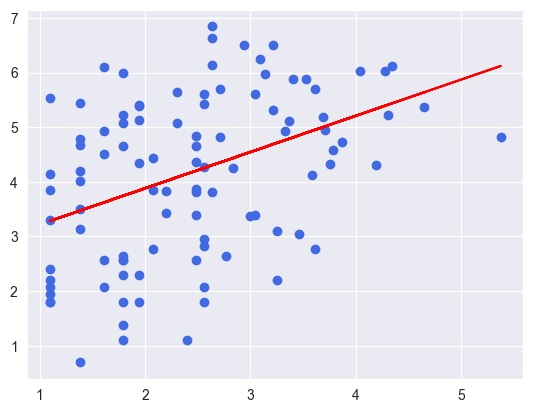

In [31]:
X = DataFrame(sample, columns=['log_contributors'])
y = DataFrame(sample, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()


R^2 Score: 0.06404146715695636


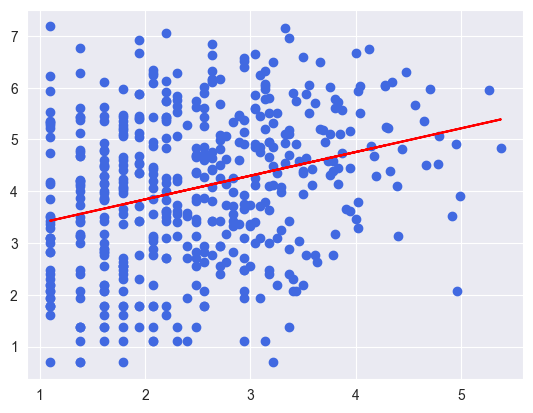

In [32]:
X = DataFrame(df, columns=['log_contributors'])
y = DataFrame(df, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()


## Commits vs Similarities

R^2 Score: 0.47480387354616216


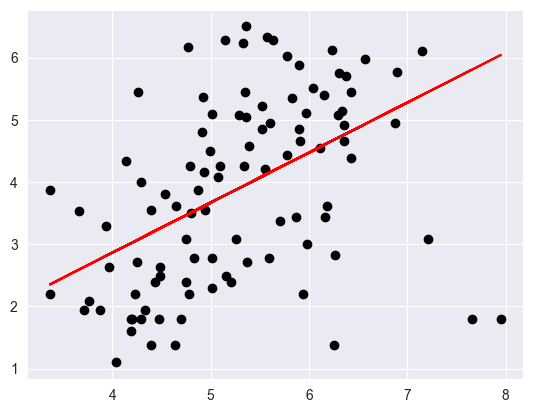

In [33]:
sample = df.sample(100)
X = DataFrame(sample, columns=['log_commits'])
y = DataFrame(sample, columns=['log_similarities'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='red')
plt.show()


R^2 Score: 0.0840282488511298


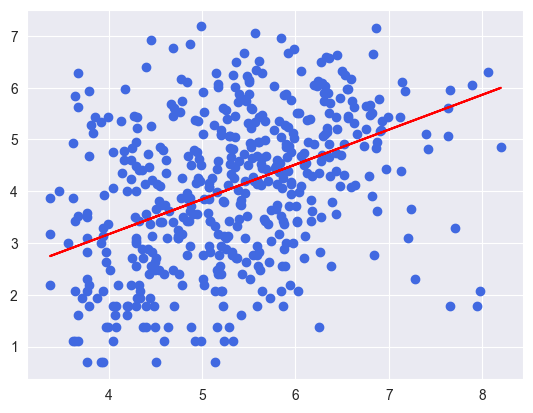

In [34]:
X = DataFrame(df, columns=['log_commits'])
y = DataFrame(df, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()

## NFiles vs Similarities

R^2 Score: 0.12696441776619605


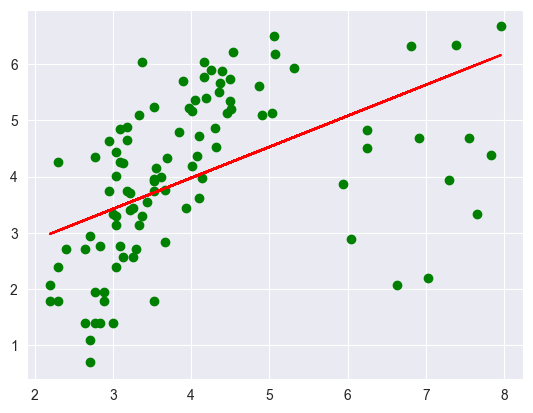

In [35]:
sample = df.sample(100)
X = DataFrame(sample, columns=['log_nfiles'])
y = DataFrame(sample, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='green')
plt.plot(X, y_pred, color='red')
plt.show()



R^2 Score: 0.19951924313068847


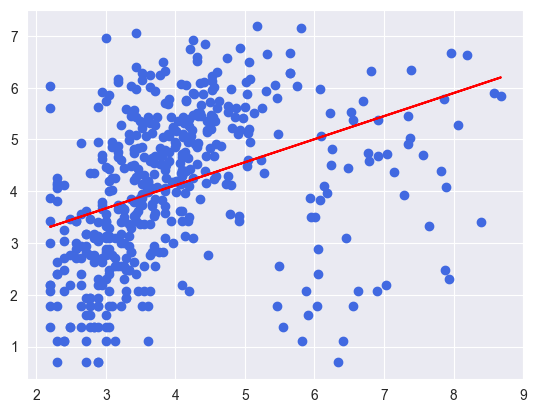

In [36]:
X = DataFrame(df, columns=['log_nfiles'])
y = DataFrame(df, columns=['log_similarities'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = HuberRegressor()
model.fit(X_train, y_train.values.ravel())

r2_score  = model.score(X_test, y_test)

print(f"R^2 Score: {r2_score}")

y_pred = model.predict(X)
plt.scatter(X, y, color='royalblue')
plt.plot(X, y_pred, color='red')
plt.show()

## Correlation Analysis

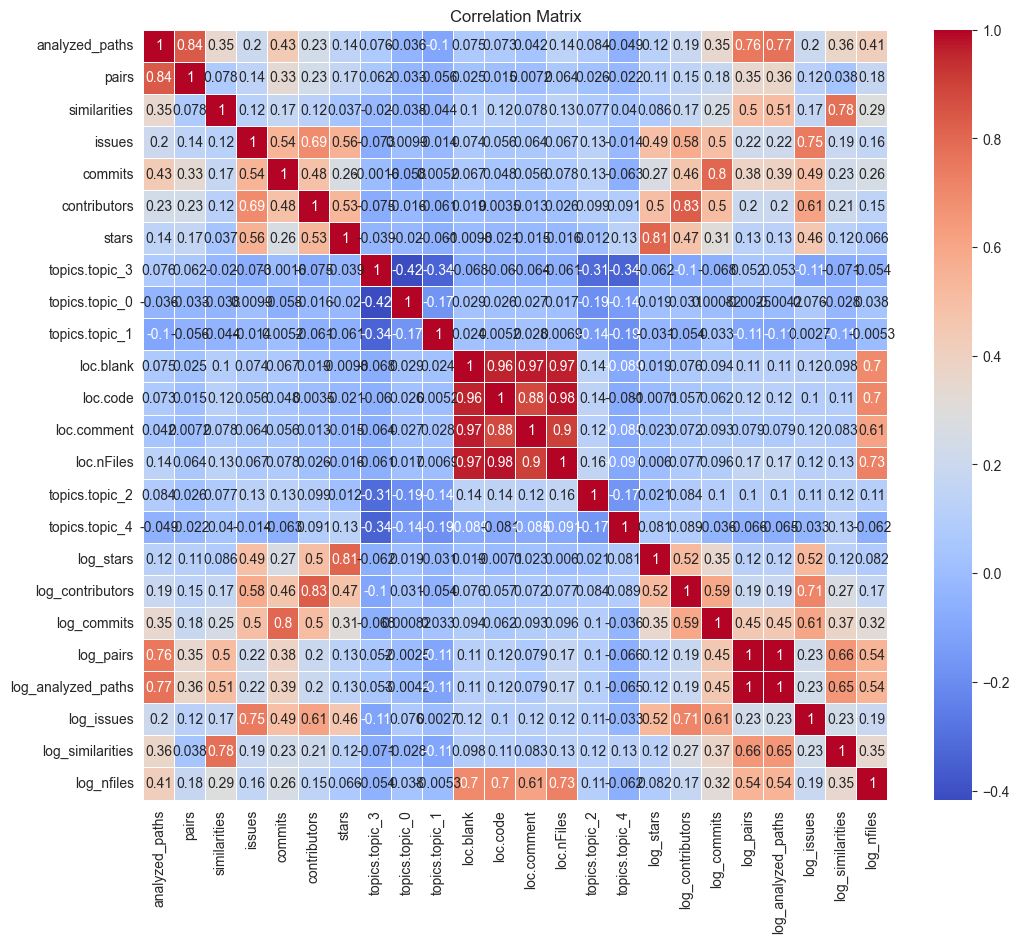

In [37]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Random Forest

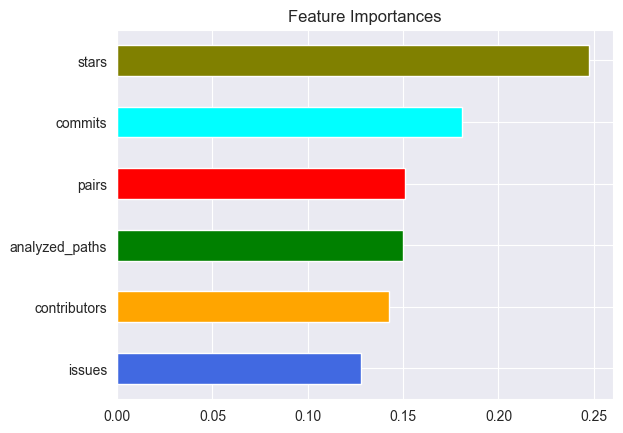

In [38]:
from sklearn.ensemble import RandomForestRegressor

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh', color=['royalblue', 'orange', 'green', 'red', 'cyan', 'olive'])
plt.title('Feature Importances')
plt.show()

# Topic Distribution

In [39]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df_nona.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
# tdf.head()






In [53]:
tdf_resources = tdf[tdf['max_value_topic'] == 'topics.topic_3']
tdf_resources

KeyboardInterrupt: 

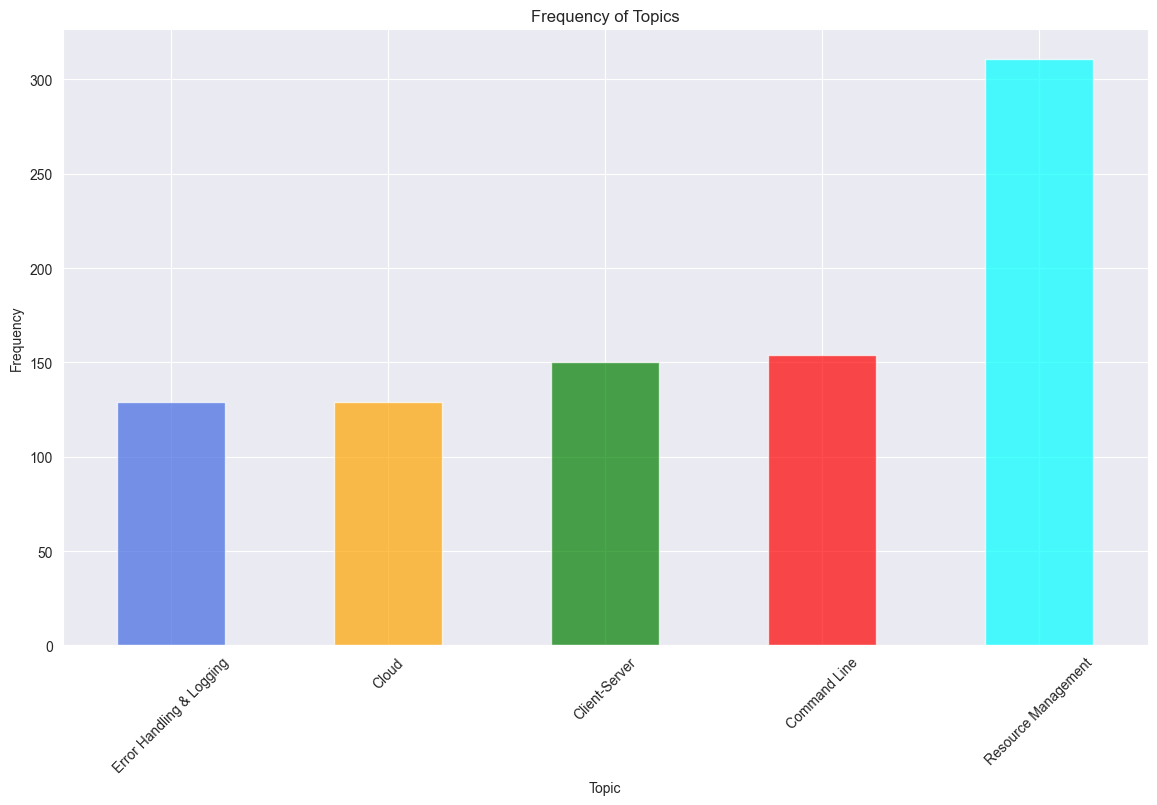

In [41]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()


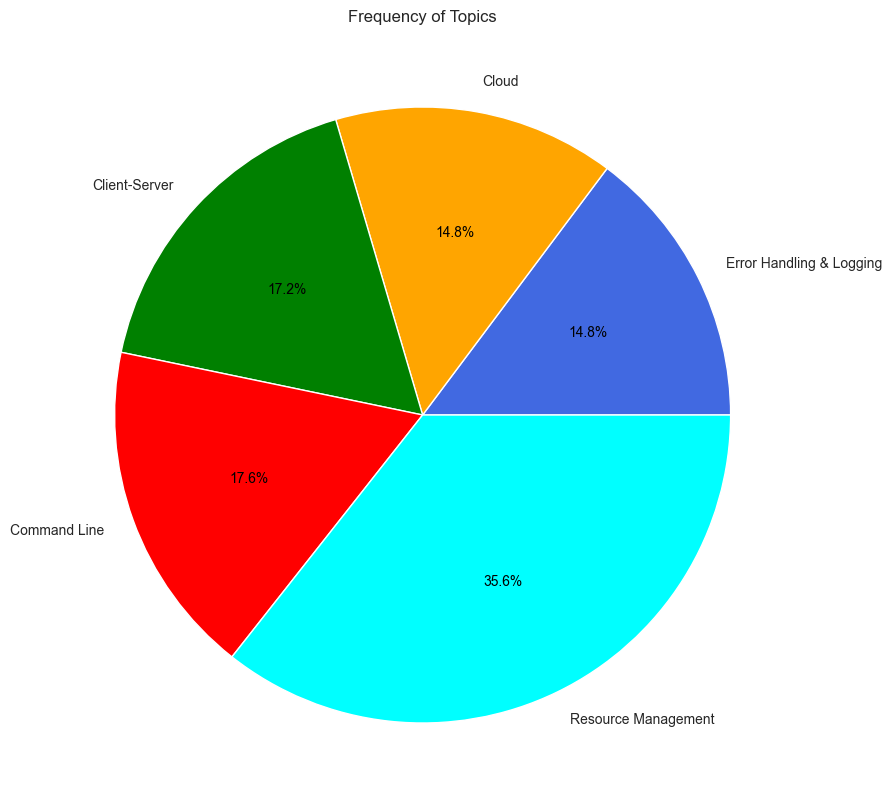

In [42]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
	autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [43]:
# verify nones
# count topics 
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series

max_value_topic
Resource Management         471
Client-Server               221
Cloud                       221
Command Line                220
Error Handling & Logging    172
Name: count, dtype: int64

# Topic Distribution With Nones


In [44]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
tdf.head()


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities,log_nfiles,max_value_topic,max_value_topic_amount
12,go-gorp/gorp,17,136,415.0,236.0,MIT,554,2012-01-04,71.0,3706,...,8.217978,4.276666,6.318968,4.919981,2.890372,5.468060,6.030685,3.367296,topics.topic_4,0.768748
46,jackc/tern,4,6,14.0,58.0,MIT,442,2011-02-08,18.0,747,...,6.617403,2.944439,6.093570,1.945910,1.609438,4.077537,2.708050,2.564949,topics.topic_0,0.513169
54,xmppo/go-xmpp,9,36,31.0,56.0,BSD-3-Clause,287,2011-02-28,54.0,509,...,6.234411,4.007333,5.662960,3.610918,2.302585,4.043051,3.465736,2.484907,topics.topic_3,0.918440
72,wernerd/GoRTP,6,15,138.0,5.0,GPL-3.0,36,2011-12-20,4.0,303,...,5.717028,1.609438,3.610918,2.772589,1.945910,1.791759,4.934474,2.639057,topics.topic_4,0.346954
104,fhs/gompd,4,6,61.0,21.0,MIT,277,2011-08-31,24.0,138,...,4.934474,3.218876,5.627621,1.945910,1.609438,3.091042,4.127134,2.302585,topics.topic_3,0.811409


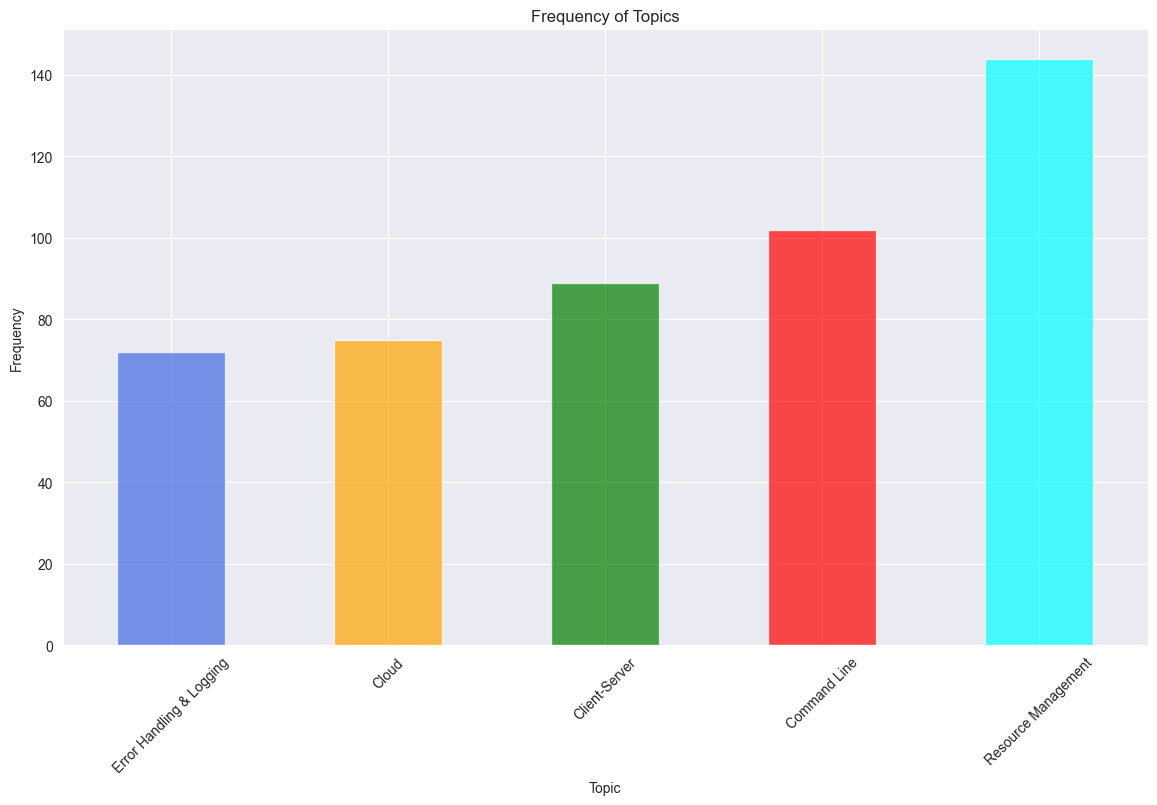

In [45]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()

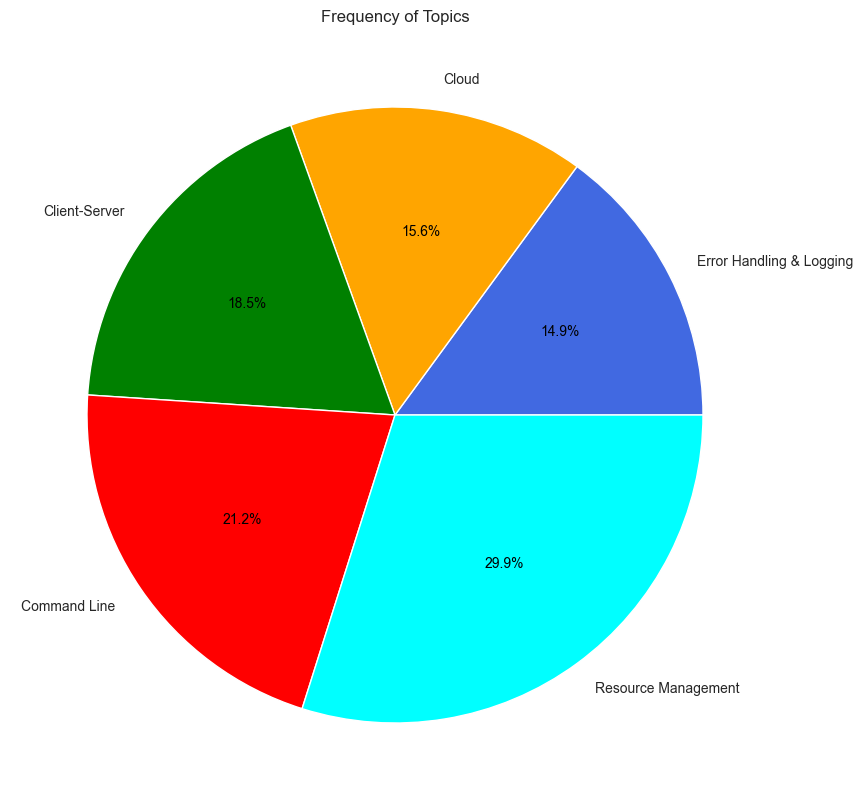

In [46]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
    autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [47]:
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series


max_value_topic
Resource Management         146
Command Line                103
Client-Server                91
Cloud                        75
Error Handling & Logging     72
Name: count, dtype: int64

# Clone Density


In [48]:
tdf['clone_density'] = (tdf['loc.nFiles'] / tdf['similarities']) * 1000
tdf.head()

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities,log_nfiles,max_value_topic,max_value_topic_amount,clone_density
12,go-gorp/gorp,17,136,415.0,236.0,MIT,554,2012-01-04,71.0,3706,...,4.276666,6.318968,4.919981,2.890372,5.468060,6.030685,3.367296,topics.topic_4,0.768748,67.469880
46,jackc/tern,4,6,14.0,58.0,MIT,442,2011-02-08,18.0,747,...,2.944439,6.093570,1.945910,1.609438,4.077537,2.708050,2.564949,topics.topic_0,0.513169,857.142857
54,xmppo/go-xmpp,9,36,31.0,56.0,BSD-3-Clause,287,2011-02-28,54.0,509,...,4.007333,5.662960,3.610918,2.302585,4.043051,3.465736,2.484907,topics.topic_3,0.918440,354.838710
72,wernerd/GoRTP,6,15,138.0,5.0,GPL-3.0,36,2011-12-20,4.0,303,...,1.609438,3.610918,2.772589,1.945910,1.791759,4.934474,2.639057,topics.topic_4,0.346954,94.202899
104,fhs/gompd,4,6,61.0,21.0,MIT,277,2011-08-31,24.0,138,...,3.218876,5.627621,1.945910,1.609438,3.091042,4.127134,2.302585,topics.topic_3,0.811409,147.540984


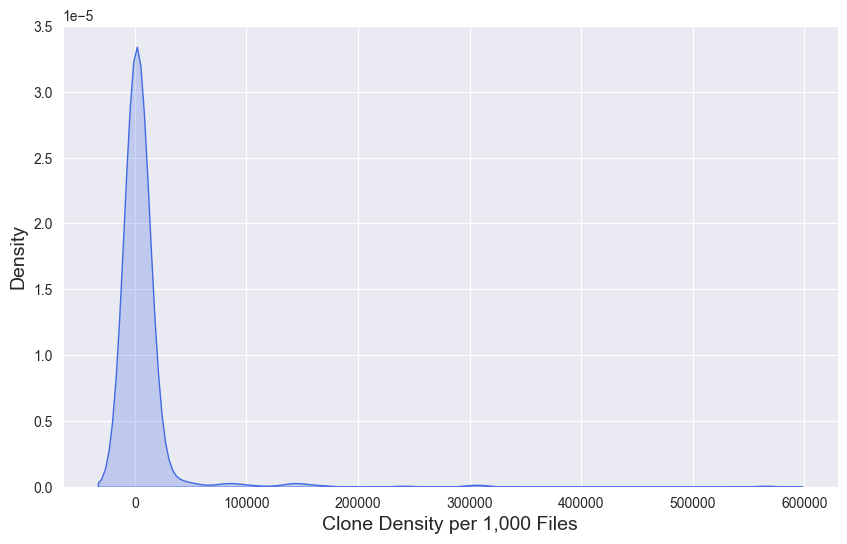

In [49]:
# Assuming df is your DataFrame with the clone density already calculated
plt.figure(figsize=(10, 6))

# Density Plot
sb.kdeplot(tdf['clone_density'], fill=True, color='royalblue')

# Adding titles and labels
# plt.title('Density Plot of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Display the plot
plt.show()

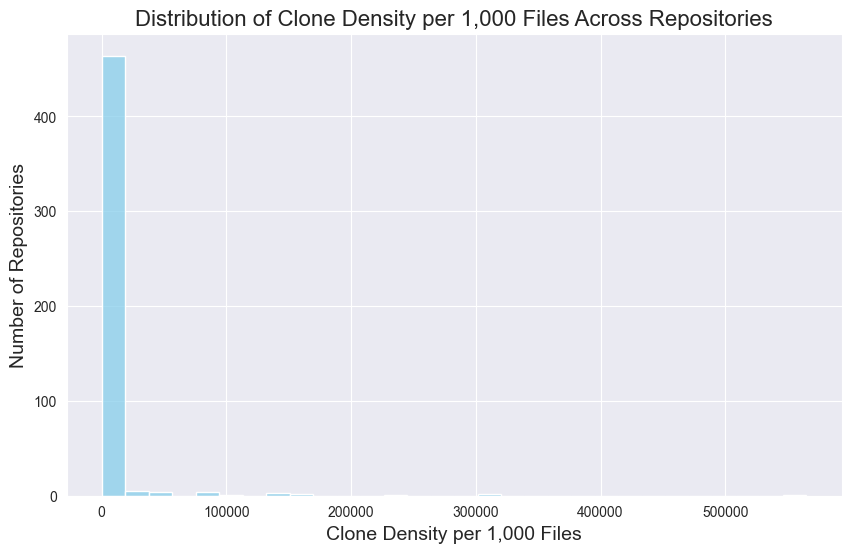

In [50]:
plt.figure(figsize=(10, 6))

# Histogram
sb.histplot(tdf['clone_density'], kde=False, bins=30, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Number of Repositories', fontsize=14)

# Display the plot
plt.show()